In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine('sqlite:///hawaii.sqlite')

In [6]:
# reflect an existing database into a new model
Base  = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [7]:
# We can view all of the classes that automap found
    ##<Personal comment> class sqlalchemy.ext.automap.AutomapBase
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

start_day = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
    #<Personal Additional comment> class datetime.timedelta(days=0, seconds=0, microseconds=0, 
    # milliseconds=0, minutes=0, hours=0, weeks=0)¶

prev_year = start_day - dt.timedelta(days= 365)

# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=prev_year).all()

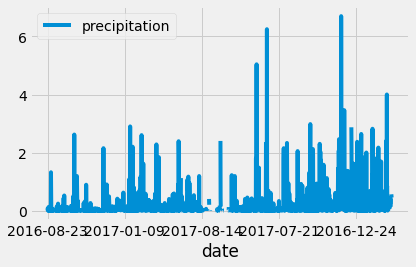

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results,columns=['date','precipitation'])
df.set_index(df['date'],inplace=True)

# Sort the dataframe by date

df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data


df.plot()
plt.tight_layout()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [14]:
# 9.3.2 What are the most active stations?
# List the stations and the counts in descending order.
count_station =func.count(Measurement.station)

results = session.query(Measurement.station,count_station).\
group_by(Measurement.station).order_by(count_station.desc()).all()
results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
min_temp = func.min(Measurement.tobs)
max_temp = func.max(Measurement.tobs)
avg_temp = func.avg(Measurement.tobs)
session.query(min_temp,max_temp,avg_temp).filter(Measurement.station =='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

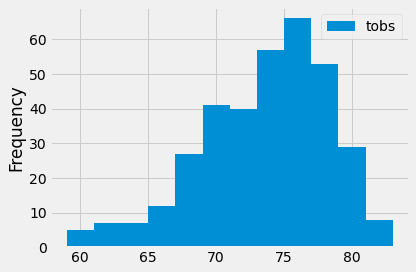

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date>=prev_year).all()
observ_df = pd.DataFrame(results,columns=['tobs'])
observ_df
observ_df.plot.hist(bins=12)
plt.tight_layout()

Looking at this plot, we can infer that a vast majority of the observations were over 67 degrees. If you count up the bins to the right of 67 degrees, you will get about 325 days where it was over 67 degrees when the temperature was observed.

In [17]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start, end): # '%Y-%m-%d'
    min_temp = func.min(Measurement.tobs)
    avg_temp = func.avg(Measurement.tobs)
    max_temp = func.max(Measurement.tobs)
    starting_date = dt.strptime(start, '%Y-%m-%d')
    ending_date_date = dt.strptime(end, '%Y-%m-%d')
    output = session.query(min_temp,avg_temp,max_temp).\
        filter(Measurement.date.\
               between(starting_date,ending_date)).\
        all()
    return output

calc_temps()

TypeError: calc_temps() missing 2 required positional arguments: 'start' and 'end'

# Challenge

Adjust the number of bins in the plot to 5, and then adjust the number to 20. Take note of any differences in the plot caused by changing the number of bins.

In [ ]:
 def station_highest_numbers(highest, bins):
    results = session.query(Measurement.tobs).\
        filter(Measurement.station == highest).\
        filter(Measurement.date>=prev_year).all()
    observ_df = pd.DataFrame(results,columns=['tobs'])
    observ_df
    observ_df.plot.hist(bins=bins)
    plt.tight_layout()

In [ ]:
station_highest_numbers('USC00519281',5)

In [ ]:
station_highest_numbers('USC00519281',20)

In [ ]:
station_highest_numbers('USC00519281',30)